<a href="https://colab.research.google.com/github/PhamDucThinh1995/Method-Pruning/blob/main/Pruning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder


from google.colab import drive
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


In [3]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

%cd /content/gdrive/MyDrive/Kaggle

/content/gdrive/MyDrive/Kaggle


In [3]:
!kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip titanic.zip -d titanic

Archive:  titanic.zip
replace titanic/gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
data = pd.read_csv("./titanic/train.csv")
data = data.loc[:,("Survived","Pclass","Sex","Age","SibSp","Parch","Fare")]
data.head ()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [5]:
data.count()  ### Balance and beautiful data!!!

Survived    891
Pclass      891
Sex         891
Age         714
SibSp       891
Parch       891
Fare        891
dtype: int64

In [6]:
data.dropna(inplace=True)
#'inplace=True' applies the code to the 'data' object.
le = LabelEncoder()
data.Sex = le.fit_transform(data.Sex)

### LABEL ENCODER is the pre-processing step, mimic the one hot coding: https://scikit-learn.org/stable/modules/preprocessing_targets.html#preprocessing-targets

In [7]:
data.Sex.unique() ### The value in the data.Sex

array([1, 0])

In [8]:
x = data.iloc[:,1:]   # Second column until the last column
y = data.iloc[:,0]    # First column (Survived) is our target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)

In [9]:
y_test

883    0
150    0
762    1
266    0
178    0
      ..
419    0
545    0
226    1
599    1
658    0
Name: Survived, Length: 215, dtype: int64

In [10]:
y.unique()

array([0, 1])

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dt_classifier = DecisionTreeClassifier(random_state = 42)
dt_classifier.fit(x_train, y_train)  #train parameters: features and target
pred = dt_classifier.predict(x_test)

In [13]:
dt_classifier

DecisionTreeClassifier(random_state=42)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)
#parameters: targets to be predicted and predictions from new data used before

0.7674418604651163

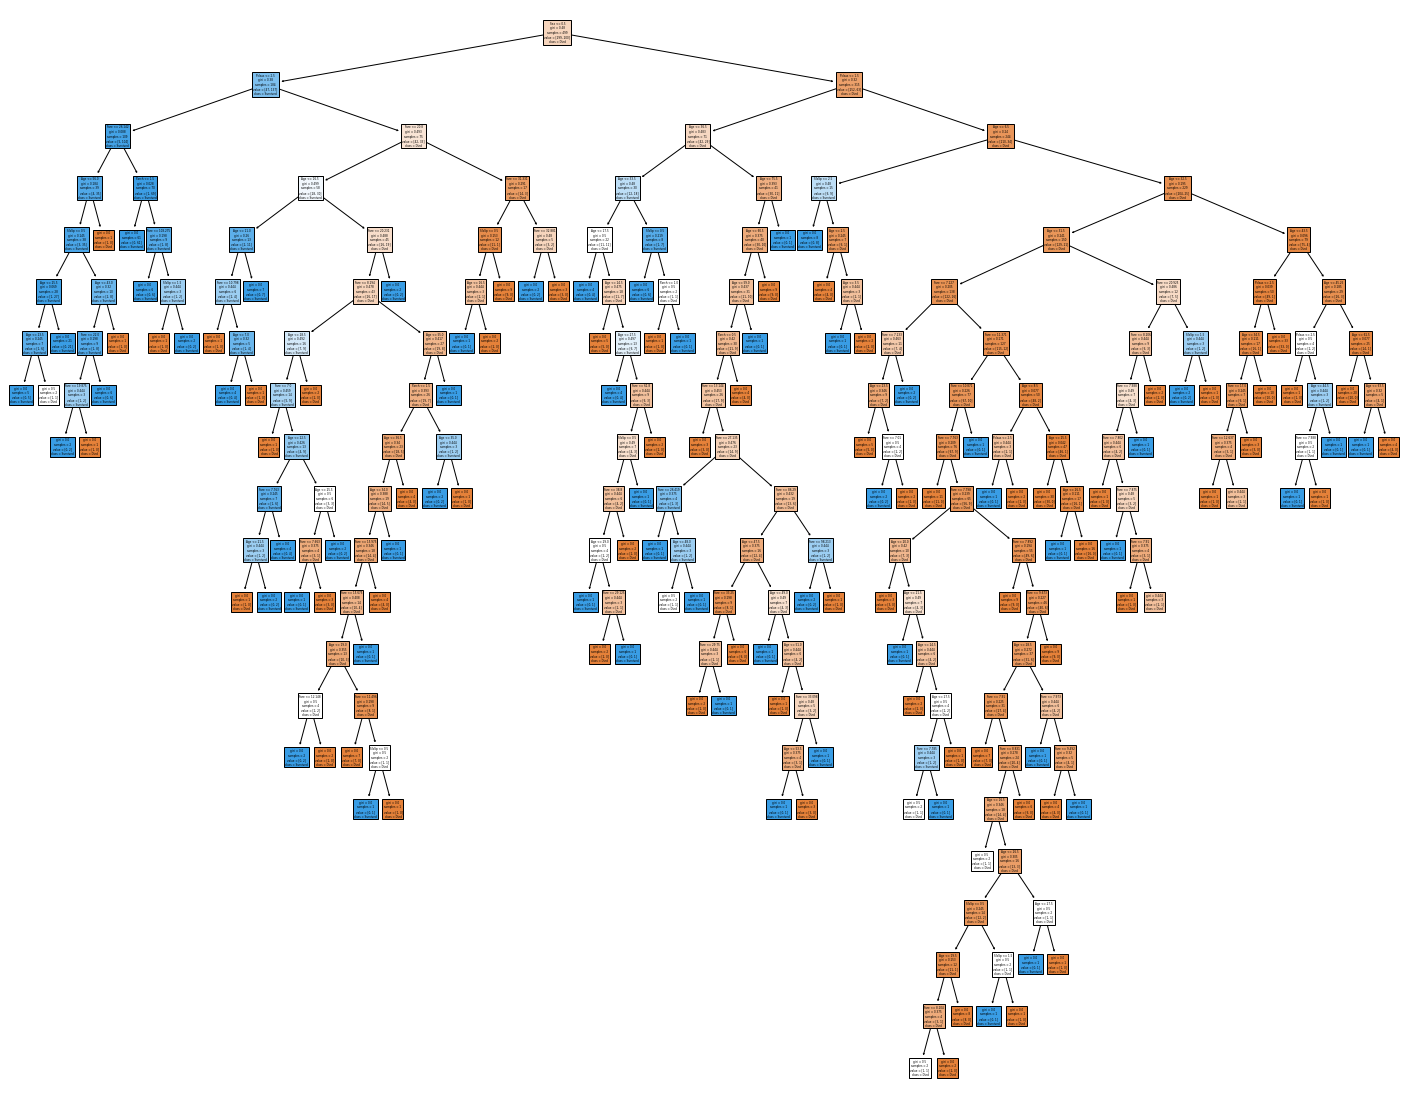

In [15]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_classifier, 
                   feature_names=x.columns,  
                   class_names=["Died", "Survived"],
                   filled=True)

In [16]:
max_depth = []
acc = []
for i in range(1,30):
 dt_classifier = DecisionTreeClassifier(max_depth=i, random_state = 42)
 dt_classifier.fit(x_train, y_train)
 pred = dt_classifier.predict(x_test)
 acc.append(accuracy_score(y_test, pred))
 max_depth.append(i)

In [17]:
print(max(acc))

0.8186046511627907


In [18]:
print(acc)

[0.7813953488372093, 0.7767441860465116, 0.8186046511627907, 0.813953488372093, 0.813953488372093, 0.7953488372093023, 0.7906976744186046, 0.786046511627907, 0.772093023255814, 0.7581395348837209, 0.7534883720930232, 0.7674418604651163, 0.772093023255814, 0.7581395348837209, 0.7627906976744186, 0.7674418604651163, 0.7674418604651163, 0.7674418604651163, 0.7674418604651163, 0.7674418604651163, 0.7674418604651163, 0.7674418604651163, 0.7674418604651163, 0.7674418604651163, 0.7674418604651163, 0.7674418604651163, 0.7674418604651163, 0.7674418604651163, 0.7674418604651163]


In [19]:
depth = acc.index(max(acc)) + 1

In [20]:
depth

3

In [21]:
dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state = 42)
dt_classifier.fit(x_train, y_train)
pred = dt_classifier.predict(x_test)
accuracy_score(y_test, pred)

0.8186046511627907

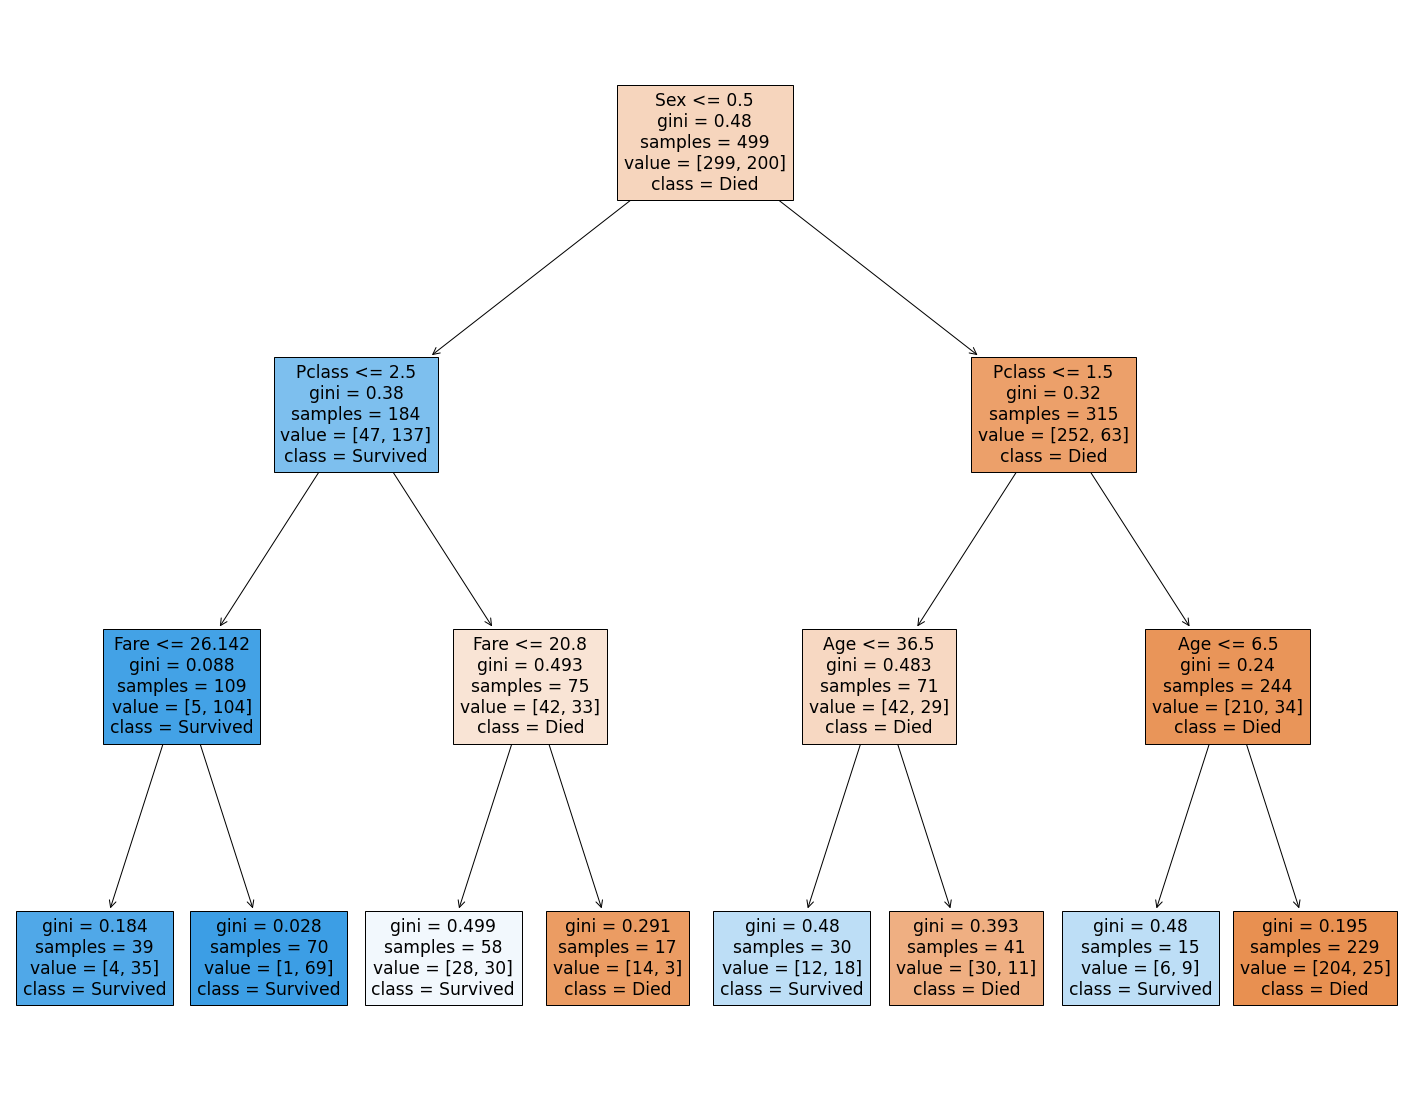

In [22]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_classifier, 
                   feature_names=x.columns,  
                   class_names=["Died", "Survived"],
                   filled=True)